
Data shape: (1000098, 52)

Data types:
 underwrittencoverid                  int64
policyid                             int64
transactionmonth            datetime64[ns]
isvatregistered                       bool
citizenship                         object
legaltype                           object
title                               object
language                            object
bank                                object
accounttype                         object
maritalstatus                       object
gender                              object
country                             object
province                            object
postalcode                           int64
maincrestazone                      object
subcrestazone                       object
itemtype                            object
mmcode                             float64
vehicletype                         object
registrationyear                     int64
make                                object
model        

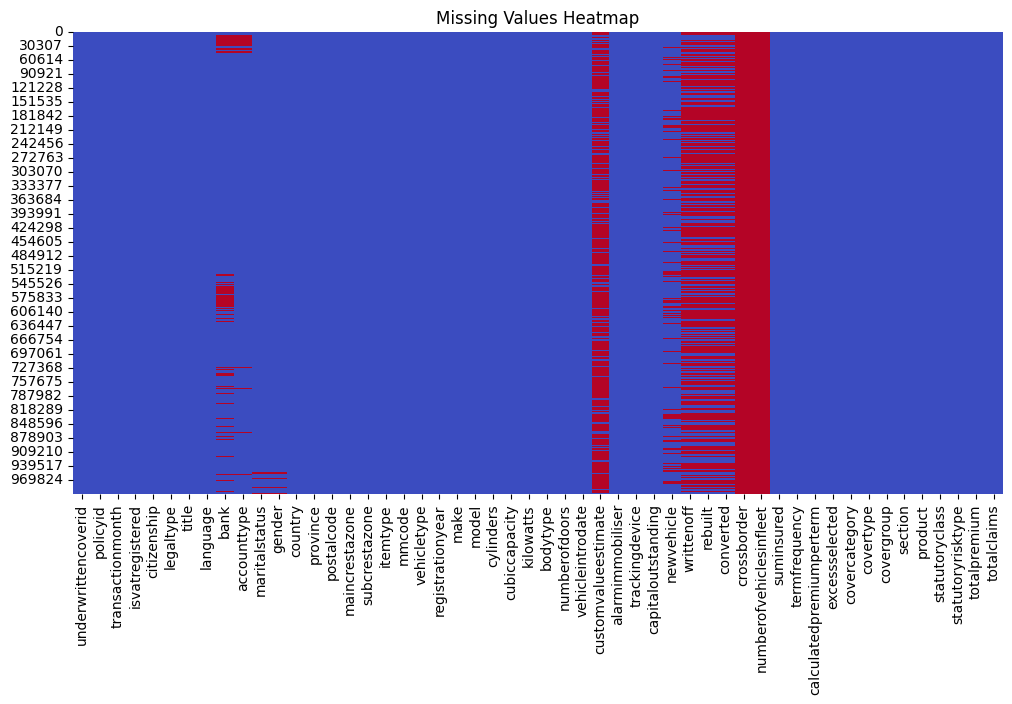

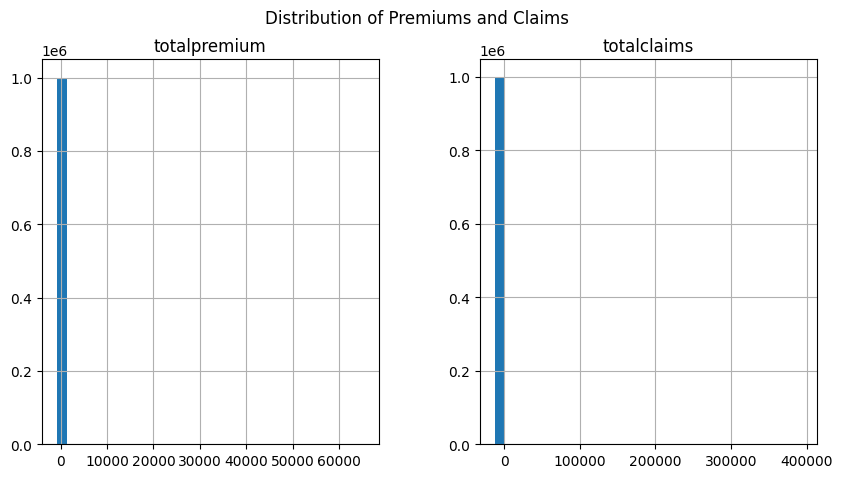

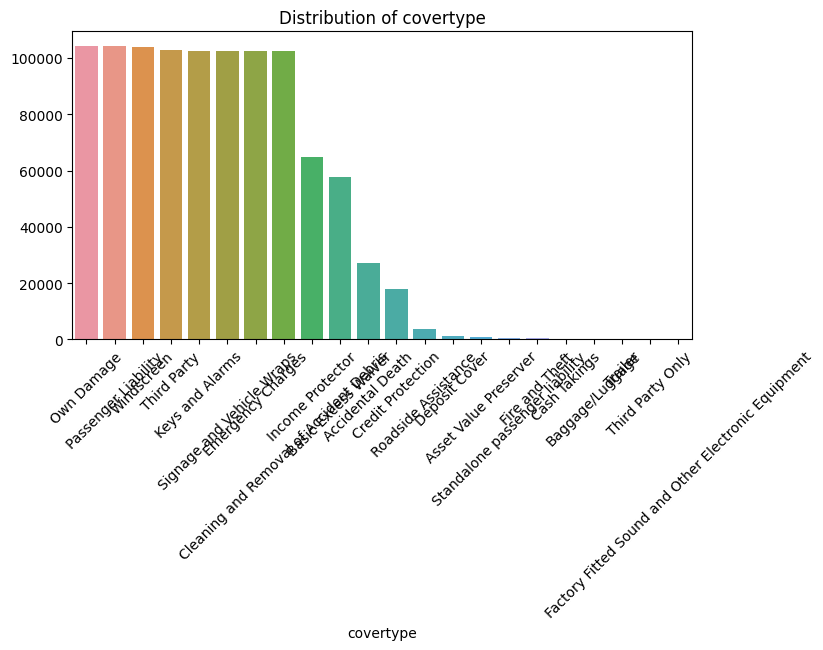

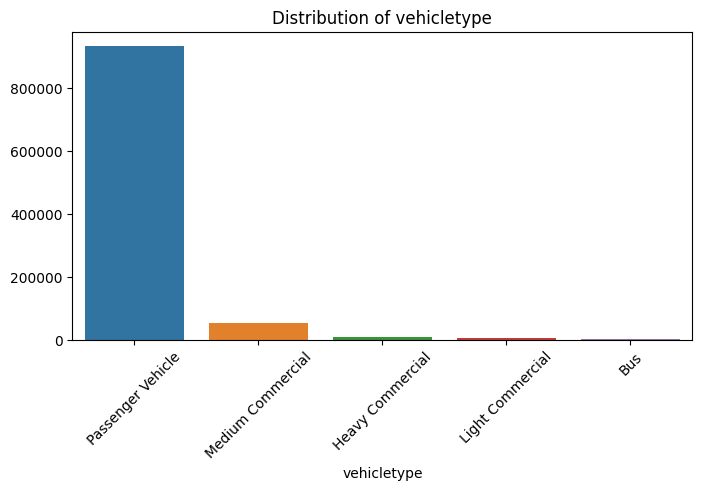

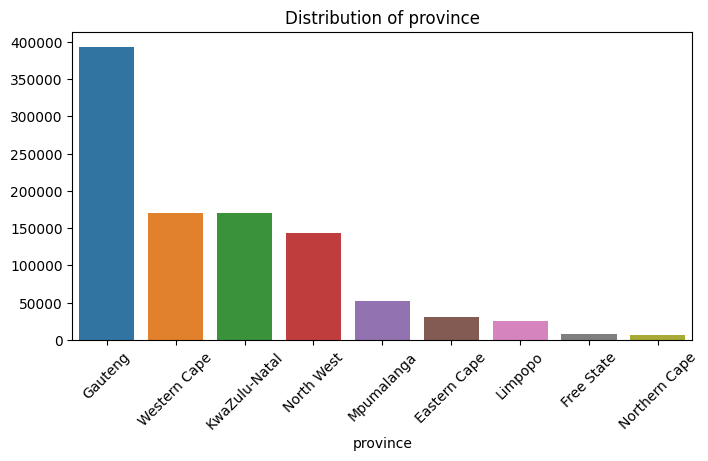

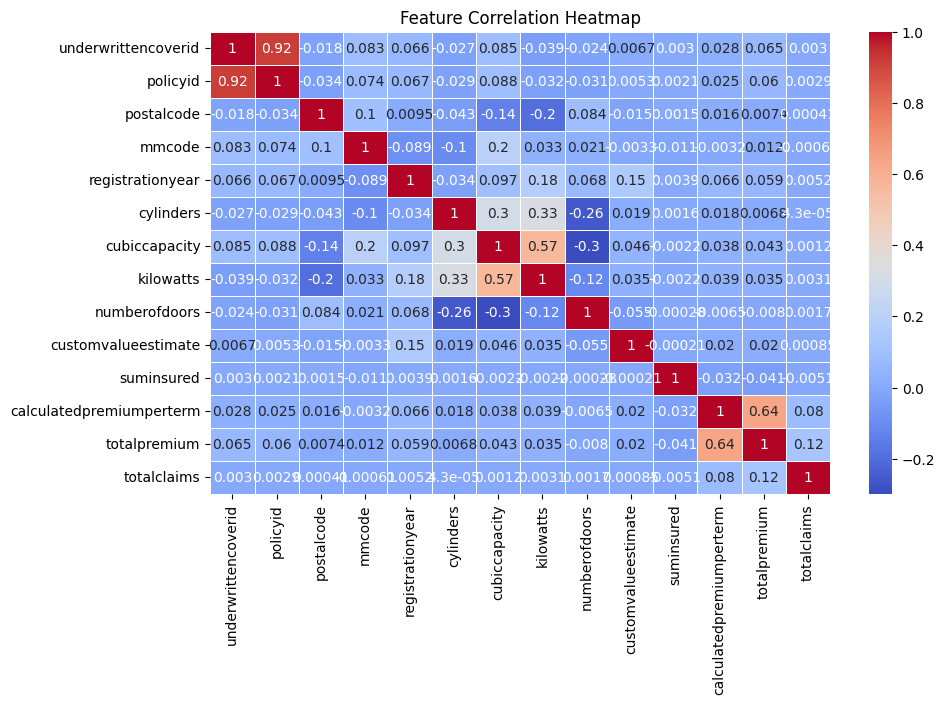

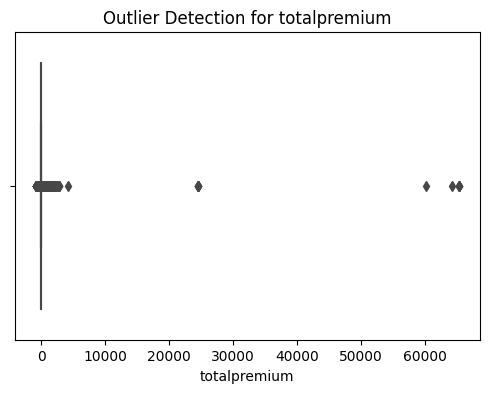

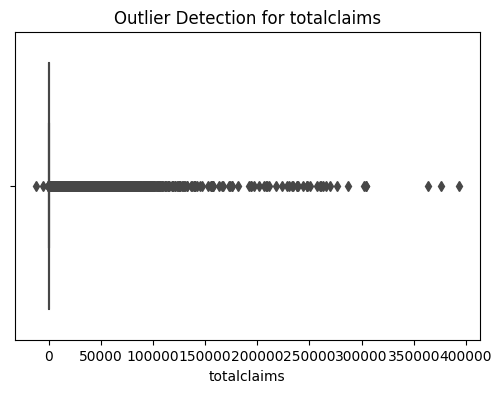

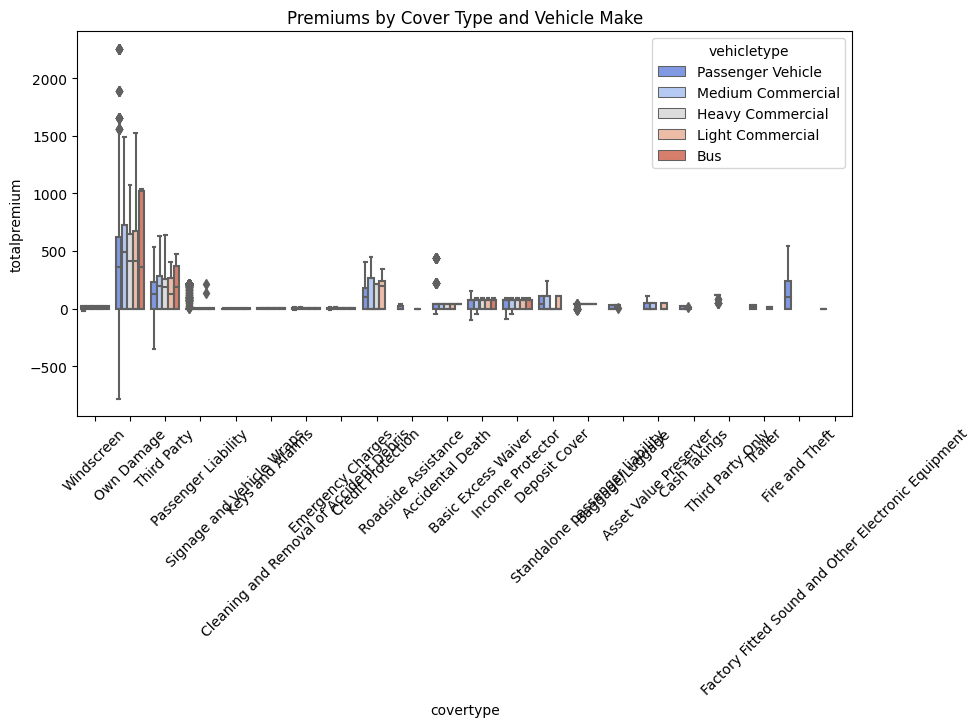

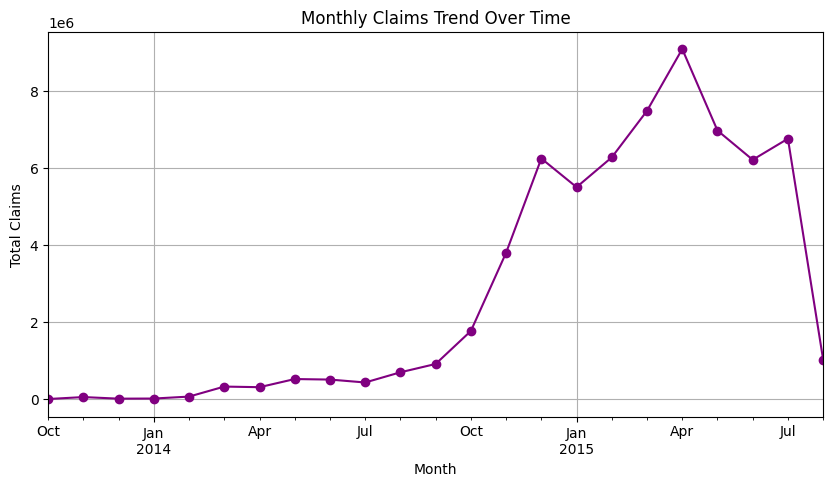

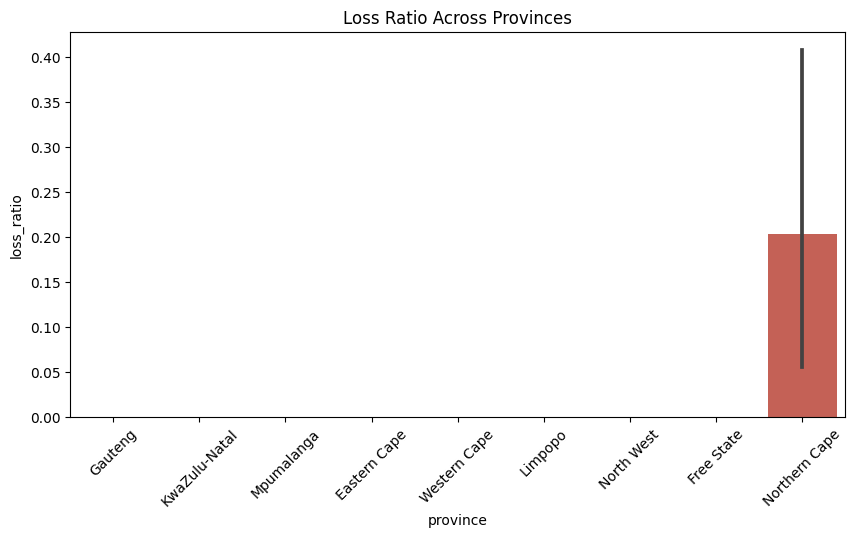

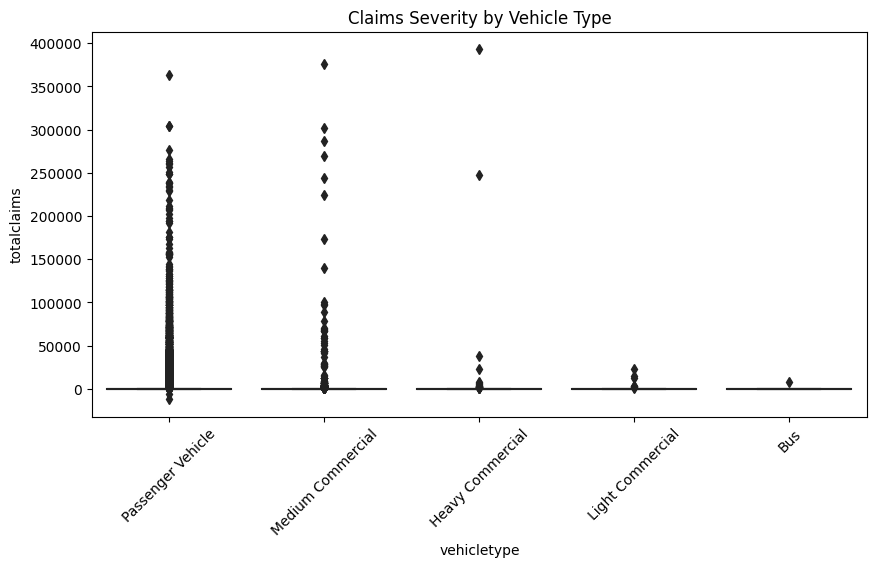

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

class InsuranceDataAnalysis:
    def __init__(self, data_path):
        self.df = pd.read_parquet(data_path)
        self.numeric_cols = ['totalpremium', 'totalclaims']
        self.categorical_cols = ['covertype', 'vehicletype', 'province']

    def summarize_data(self):
        print(f"\nData shape: {self.df.shape}")
        print("\nData types:\n", self.df.dtypes)
        print("\nMissing values:\n", self.df.isnull().sum().sort_values(ascending=False))
        
        # Descriptive Statistics
        print("\n=== Descriptive Statistics ===")
        descriptive_stats = self.df[self.numeric_cols].describe()
        print(descriptive_stats)

        # Calculate variability
        variability = descriptive_stats.loc[['std', 'min', 'max']]
        print("\n=== Variability ===")
        print(variability)

    def assess_data_quality(self):
        plt.figure(figsize=(12, 6))
        sns.heatmap(self.df.isnull(), cbar=False, cmap="coolwarm")
        plt.title("Missing Values Heatmap")
        plt.show()

    def univariate_analysis(self):
        # Numeric column distributions
        self.df[self.numeric_cols].hist(figsize=(10, 5), bins=30)
        plt.suptitle("Distribution of Premiums and Claims")
        plt.show()

        # Categorical column distributions
        for col in self.categorical_cols:
            plt.figure(figsize=(8, 4))
            sns.barplot(x=self.df[col].value_counts().index, y=self.df[col].value_counts().values)
            plt.title(f"Distribution of {col}")
            plt.xticks(rotation=45)
            plt.show()

    def bivariate_analysis(self):
        numeric_df = self.df.select_dtypes(include=['number', 'float64', 'int64']).dropna(axis=1, how='all')
        if not numeric_df.empty:
            plt.figure(figsize=(10, 6))
            sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
            plt.title("Feature Correlation Heatmap")
            plt.show()
        else:
            print("⚠️ No valid numeric data available for correlation matrix.")

    def outlier_detection(self):
        for col in self.numeric_cols:
            plt.figure(figsize=(6, 4))
            sns.boxplot(data=self.df, x=col, palette="magma")
            plt.title(f"Outlier Detection for {col}")
            plt.show()

    def analyze_trends(self):
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=self.df, x='covertype', y='totalpremium', hue='vehicletype', palette='coolwarm')
        plt.title("Premiums by Cover Type and Vehicle Make")
        plt.xticks(rotation=45)
        plt.show()

    def key_insights_visualization(self):
        self.df['loss_ratio'] = self.df['totalclaims'] / self.df['totalpremium']
        self.df.dropna(subset=['loss_ratio'], inplace=True)

        if 'transactionmonth' in self.df.columns:
            monthly_claims = self.df.groupby('transactionmonth')['totalclaims'].sum()
            monthly_claims.plot(figsize=(10, 5), marker='o', color='purple')
            plt.title("Monthly Claims Trend Over Time")
            plt.ylabel("Total Claims")
            plt.xlabel("Month")
            plt.grid()
            plt.show()

        if 'loss_ratio' in self.df.columns:
            plt.figure(figsize=(10, 5))
            sns.barplot(data=self.df, x='province', y='loss_ratio', palette='coolwarm')
            plt.title("Loss Ratio Across Provinces")
            plt.xticks(rotation=45)
            plt.show()

        plt.figure(figsize=(10, 5))
        sns.boxplot(data=self.df, x='vehicletype', y='totalclaims', palette='magma')
        plt.title("Claims Severity by Vehicle Type")
        plt.xticks(rotation=45)
        plt.show()

analysis = InsuranceDataAnalysis("../data/processed/insurance_data.parquet")
analysis.summarize_data()
analysis.assess_data_quality()
analysis.univariate_analysis()
analysis.bivariate_analysis()
analysis.outlier_detection()
analysis.analyze_trends()
analysis.key_insights_visualization()
